In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [49]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).first()
max_date

('2017-08-23',)

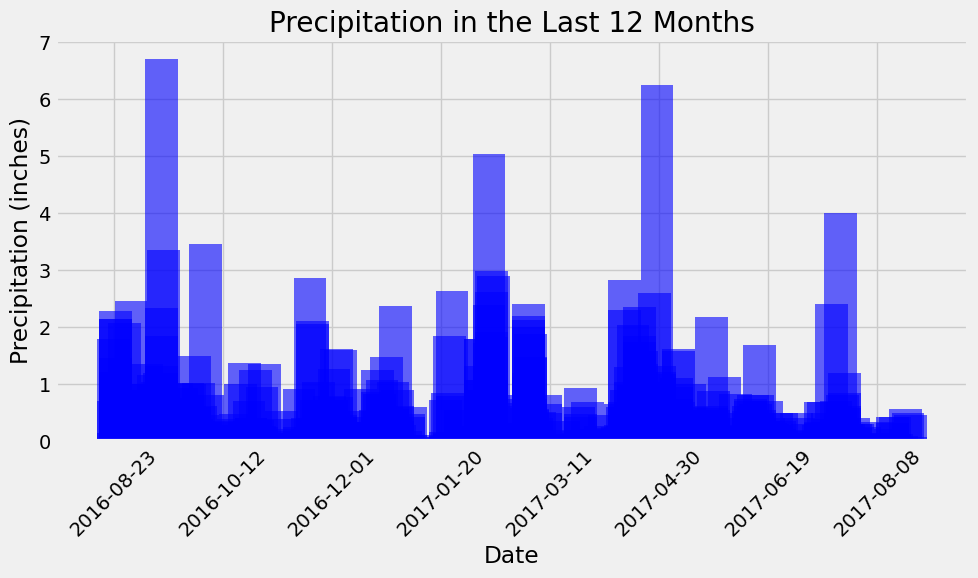

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = max_date[0]


#Def used chatgpt for the syntax on some of this cell. it wasnt running for so long

# Calculate the date one year from the last date in data set.
furthest_date = (pd.to_datetime(most_recent_date) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precip_span = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= furthest_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_db = pd.DataFrame(precip_span, columns=['date', 'prcp'])

# Sort the dataframe by date
rain_db.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(rain_db['date'], rain_db['prcp'], width=15, color='blue', alpha=0.6)  # Adjust the width as needed
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')

# Set the x-axis tick frequency to show every two weeks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # You can adjust the number of ticks

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#ok here is where i needed chatgpt more to help with the graph i was having issues. i noticed its not exactly like the example that was given but that data is the same. 
#


In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = rain_db['prcp'].describe()

print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
stations_number = session.query(Station.station).count()
stations_number

9

In [56]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")
    

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()


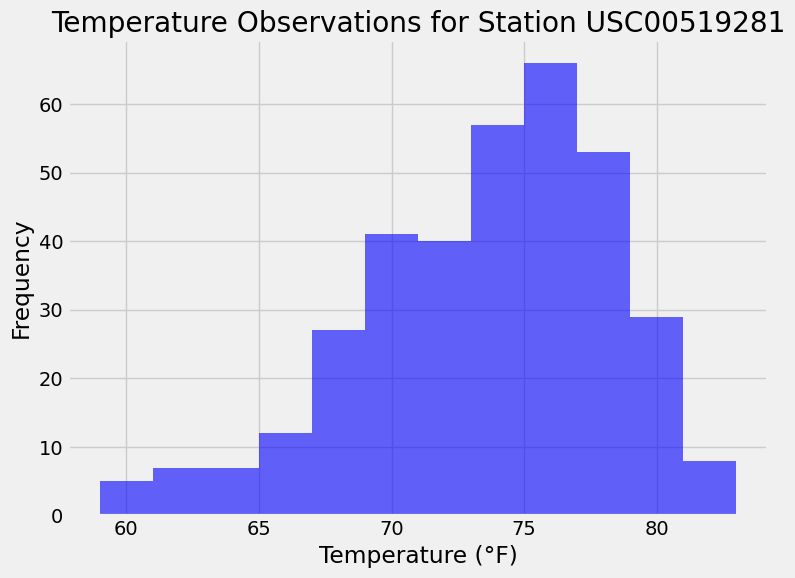

In [58]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temps = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station, Measurement.date >= furthest_date).all()

temperatures = [temp[0] for temp in last_12_months_temps]

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, color='blue', alpha=0.6)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.tight_layout()
plt.show()


#I used chatgpt to help with making the query and making the graph.



# Close Session

In [59]:
# Close Session
session.close()